<a href="https://colab.research.google.com/github/wesleycoutinhodev/pln-b2w-reviews/blob/main/notebooks/Operacao_6_TextVectorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Header padrão para todos os notebooks
"""
# PLN - B2W Reviews Analysis
# Operação 6: [Nome da Operação]
# Equipe: Wesley, Averinaldo, Carlos Daniel, Paulo Henrique
# UFPI - 2024.2
"""

# Imports padrão
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import warnings
warnings.filterwarnings('ignore')

# Configurações
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)

# Mount Drive e Setup
drive.mount('/content/drive')
BASE_PATH = '/content/drive/MyDrive/PLN_B2W_Reviews'

print("🚀 Notebook configurado com sucesso!")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
🚀 Notebook configurado com sucesso!


In [5]:
import os

# List contents of the parent directory of the path provided by the user
parent_dataset_path = os.path.join(BASE_PATH, 'data')
files_in_parent_dataset = os.listdir(parent_dataset_path)
print(files_in_parent_dataset)

['temp', 'raw', 'processed']


In [6]:
# Caminho para o arquivo de treino
train_data_path = os.path.join(BASE_PATH, 'data', 'processed', 'X_train.csv')

# Carregar os dados de treino
try:
    df_train = pd.read_csv(train_data_path)
    print(f"Arquivo {train_data_path} carregado com sucesso.")
    display(df_train.head())
except FileNotFoundError:
    print(f"Erro: Arquivo não encontrado em {train_data_path}")
    print("Por favor, verifique o caminho do arquivo.")

Arquivo /content/drive/MyDrive/PLN_B2W_Reviews/data/processed/X_train.csv carregado com sucesso.


,review_text
0,Recomendo a todos. Fiquei com receio da cor po...
1,"Ótimo produto, excelente câmera e processador ..."
2,Excelente produto e melhor ainda a agilidade d...
3,Excelente produto muito bom chegou em bom esta...
4,"Já conhecia o produto, não é um produto perfei..."


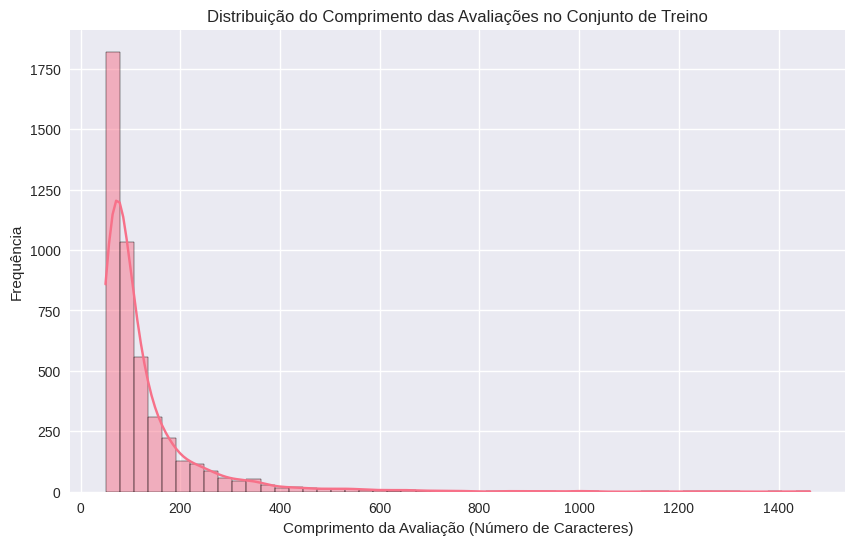


Estatísticas descritivas do comprimento das avaliações:
count    4602.000000
mean      127.882877
std       119.139168
min        50.000000
25%        66.000000
50%        89.000000
75%       137.000000
max      1463.000000
Name: review_text, dtype: float64


In [8]:
# Calcular o comprimento de cada avaliação
review_lengths = df_train['review_text'].astype(str).apply(len)

# Plotar o histograma dos comprimentos
plt.figure(figsize=(10, 6))
sns.histplot(review_lengths, bins=50, kde=True)
plt.title('Distribuição do Comprimento das Avaliações no Conjunto de Treino')
plt.xlabel('Comprimento da Avaliação (Número de Caracteres)')
plt.ylabel('Frequência')
plt.show()

# Exibir algumas estatísticas descritivas
print("\nEstatísticas descritivas do comprimento das avaliações:")
print(review_lengths.describe())

In [12]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

# Determinar o maxlen com base no comprimento máximo das avaliações no treino
max_review_length = review_lengths.max()
print(f"Comprimento máximo das avaliações no conjunto de treino: {max_review_length}")

# Configurar a camada TextVectorization
# Vamos usar um vocabulário razoável, por exemplo, 10000 das palavras mais frequentes,
# e definir o maxlen para o comprimento máximo para evitar truncamento.
# Ajuste max_tokens conforme necessário para o tamanho desejado do vocabulário.
max_tokens = 10000
vectorize_layer = TextVectorization(
    max_tokens=max_tokens,
    output_sequence_length=max_review_length)

# Adaptar a camada aos dados de treino para construir o vocabulário
# Passamos a coluna 'review_text' do DataFrame de treino
vectorize_layer.adapt(df_train['review_text'])

# Obter o vocabulário gerado e seu tamanho
vocabulary = vectorize_layer.get_vocabulary()
vocab_size = len(vocabulary)

print(f"\nTamanho do vocabulário gerado: {vocab_size}")

# Exemplo de vetorização de uma avaliação
# vectorized_text = vectorize_layer(df_train['review_text'].iloc[0])
# print("\nExemplo de avaliação vetorizada:")
# print(vectorized_text)

Comprimento máximo das avaliações no conjunto de treino: 1463

Tamanho do vocabulário gerado: 7157


In [11]:
# Aplicar a camada TextVectorization aos dados de treino
vectorized_reviews = vectorize_layer(df_train['review_text'])

print("Primeira avaliação vetorizada:")
print(vectorized_reviews[0])
print("\nFormato do tensor vetorizado:")
print(vectorized_reviews.shape)

Primeira avaliação vetorizada:
tf.Tensor([16  4 83 ...  0  0  0], shape=(1463,), dtype=int64)

Formato do tensor vetorizado:
(4602, 1463)


In [13]:
# Converter o tensor vetorizado para um array NumPy
vectorized_reviews_np = vectorized_reviews.numpy()

# Converter o array NumPy para um DataFrame pandas
# Cada coluna representará um token na sequência vetorizada
vectorized_df = pd.DataFrame(vectorized_reviews_np)

# Definir o caminho para salvar o arquivo CSV
output_dir = os.path.join(BASE_PATH, 'data', 'processed')
output_filename = 'vectorized_reviews_train.csv'
output_path = os.path.join(output_dir, output_filename)

# Salvar o DataFrame como CSV
# Usamos index=False para não escrever o índice do DataFrame como uma coluna no CSV
vectorized_df.to_csv(output_path, index=False)

print(f"Avaliações vetorizadas salvas com sucesso em: {output_path}")

Avaliações vetorizadas salvas com sucesso em: /content/drive/MyDrive/PLN_B2W_Reviews/data/processed/vectorized_reviews_train.csv
